# 🌳 Decision Tree Classifier (Scikit-learn Version)

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

## 📥 Load and Explore Dataset

In [2]:
df = pd.read_csv("data/insurance_claim_dataset.csv")
df.head()


,Age,Sex,Smoker,BMI,Sport,Claim
0,56,0,0,31.6,1,0
1,46,1,0,25.1,1,0
2,32,0,0,24.3,0,0
3,60,1,1,32.4,1,0
4,25,1,0,18.9,0,0


## ✂️ Split Data into Train and Test Sets

In [3]:
features = ['Age', 'Sex', 'Smoker', 'BMI', 'Sport']
target = 'Claim'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### 📈 Tuning `max_depth` with Grid Search Cross-Validation

To find the optimal depth for the decision tree, we perform a **grid search** over a range of `max_depth` values from 1 to 10 using 5-fold cross-validation.

Below is the result:

- ✅ **Best depth:** `3`
- 📊 **Best CV accuracy:** ~61.25%
- After depth 5, the accuracy drops — indicating potential **overfitting**

This confirms that setting `max_depth=3` provides a good balance between underfitting and overfitting.

The chart below visualizes the accuracy trend across different tree depths:


import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier


# Grid search for max_depth
param_grid = {'max_depth': list(range(1, 11))}
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Grid search result plotting (assumes grid_search is already run)
depths = list(range(1, 11))
scores = grid_search.cv_results_['mean_test_score']

plt.figure(figsize=(8, 5))
plt.plot(depths, scores, marker='o')
plt.title("Max Depth vs Cross-Validation Accuracy")
plt.xlabel("Max Depth")
plt.ylabel("Mean CV Accuracy")
plt.xticks(depths)
plt.grid(True)
plt.tight_layout()
plt.show()


## 🤖 Train Decision Tree Classifier

In [4]:
clf = DecisionTreeClassifier(criterion="gini",max_depth=3, random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3, random_state=42)

## 🌿 Visualize the Decision Tree

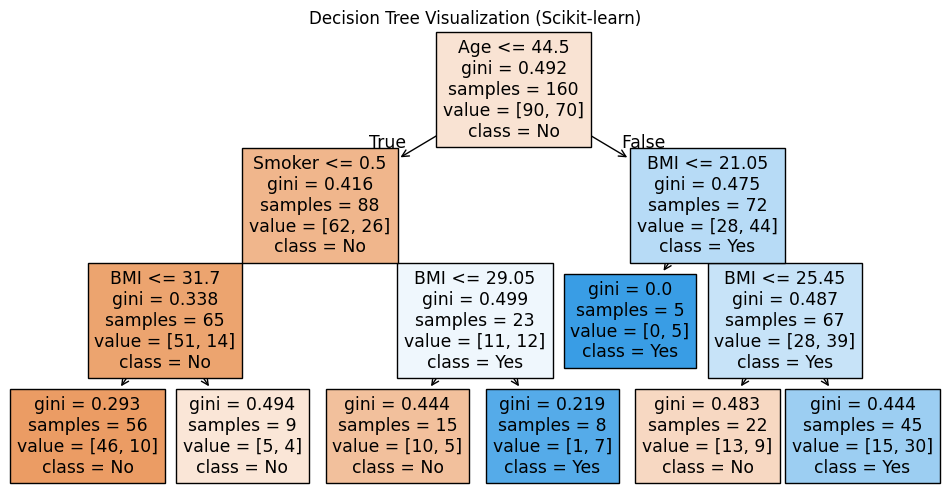

In [5]:
plt.figure(figsize=(12, 6))
plot_tree(clf, feature_names=features, class_names=["No", "Yes"], filled=True)
plt.title("Decision Tree Visualization (Scikit-learn)")
plt.show()


## 📊 Evaluate the Model

In [6]:
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.775
Confusion Matrix:
 [[24  6]
 [ 3  7]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.80      0.84        30
           1       0.54      0.70      0.61        10

    accuracy                           0.78        40
   macro avg       0.71      0.75      0.73        40
weighted avg       0.80      0.78      0.78        40



## ⭐ Feature Importance

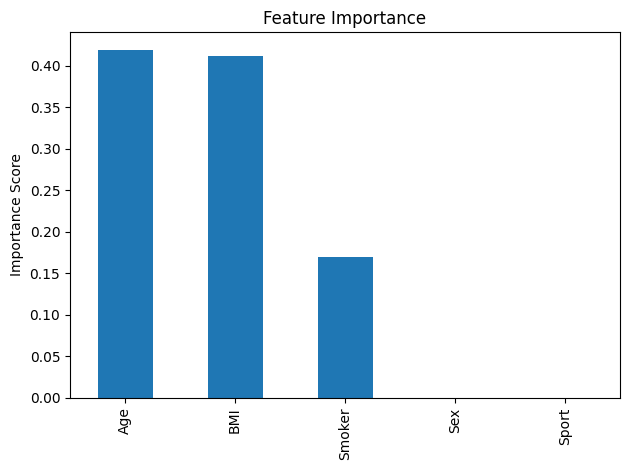

In [7]:
importances = pd.Series(clf.feature_importances_, index=features)
importances.sort_values(ascending=False).plot(kind='bar', title='Feature Importance')
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()
